### Meet Dr. Ignaz Semmelweis  
<img src='../Images/Semmelweis.jpg' style="float: left;margin:5px 20px 5px 1px" width='200' height='250'>

This is Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 and active at the Vienna General Hospital. If Dr. Semmelweis looks troubled it's probably because he's thinking about childbed fever: A deadly disease affecting women that just have given birth. He is thinking about it because in the early 1840s at the Vienna General Hospital as many as 10% of the women giving birth die from it. He is thinking about it because he knows the cause of childbed fever: It's the contaminated hands of the doctors delivering the babies. And they won't listen to him and wash their hands  

In this notebook, we're going to reanalyze the data that made Semmelweis discover the importance of handwashing. Let's start by looking at the data that made Semmelweis realize that something was wrong with the procedures at Vienna General Hospital.

In [4]:
import pandas as pd 
import numpy as np 

yearly_url = '../Datasets/yearly_deaths_by_clinic.csv'
monthly_url = '../Datasets/monthly_deaths.csv'

yearly = pd.read_csv(yearly_url)

yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


### The alarming number of deaths  
The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. You'll notice that giving birth was very dangerous; an *alarming* number of women died as the result of childbirth, most of them from childbed fever.  
  
We see this more clearly if we look at the *proportion of deaths* out of the number of women giving birth. Let's zoom in on the proportion of deaths at Clinic 1.

In [10]:
yearly['proportion'] = round((yearly.loc[:,'deaths']/yearly.loc[:,'births'])*100,2)

clinic_1 = yearly[yearly['clinic'] == 'clinic 1']
clinic_2 = yearly[yearly['clinic'] == 'clinic 2']

clinic_1.head()

,year,births,deaths,clinic,proportion
0,1841,3036,237,clinic 1,7.81
1,1842,3287,518,clinic 1,15.76
2,1843,3060,274,clinic 1,8.95
3,1844,3157,260,clinic 1,8.24
4,1845,3492,241,clinic 1,6.90


### Death at the clinics  
If we now plot the proportion of deaths at both Clinic 1 and Clinic 2  we'll see a curious pattern…

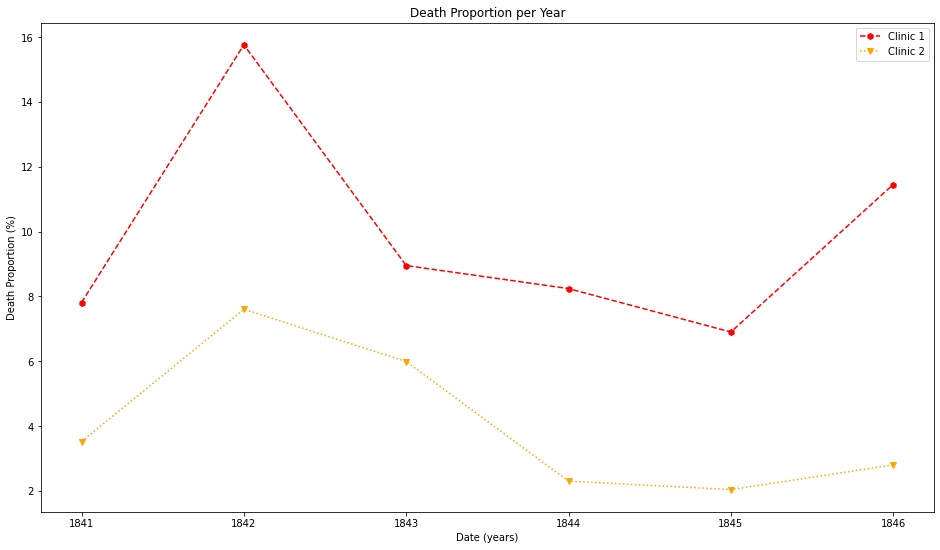

In [23]:
import matplotlib.pyplot as plt

# this make plots appear in the notebook
%matplotlib inline

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(clinic_1['year'], clinic_1['proportion'],
        marker='h', color='red', linestyle='--', label='Clinic 1')

ax.plot(clinic_2['year'], clinic_2['proportion'],
        marker='v', color='orange', linestyle=':', label='Clinic 2')

ax.set_xlabel('Date (years)')
ax.set_ylabel('Death Proportion (%)')
ax.set_title('Death Proportion per Year')
ax.legend(loc='upper right')

fig.savefig('../Images/death_proportion_per_yearly.png')
plt.show()

### The handwashing begins  
Why is the proportion of deaths consistently so much higher in Clinic 1? Semmelweis saw the same pattern and was puzzled and distressed. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses.  
  
Semmelweis started to suspect that something on the corpses spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: *Wash your hands!* This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time.  
Let's load in monthly data from Clinic 1 to see if the handwashing had any effect.

In [21]:
monthly = pd.read_csv(monthly_url)

monthly['proportion'] = round((monthly.loc[:,'deaths']/monthly.loc[:,'births'])*100, 2)
monthly['date'] = pd.to_datetime(monthly['date'])

monthly.head()

,date,births,deaths,proportion
0,1841-01-01,254,37,14.57
1,1841-02-01,239,18,7.53
2,1841-03-01,277,12,4.33
3,1841-04-01,255,4,1.57
4,1841-05-01,255,2,0.78


### The effect of handwashing  
With the data loaded we can now look at the proportion of deaths over time. In the plot below we haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that you should be able to spot it!

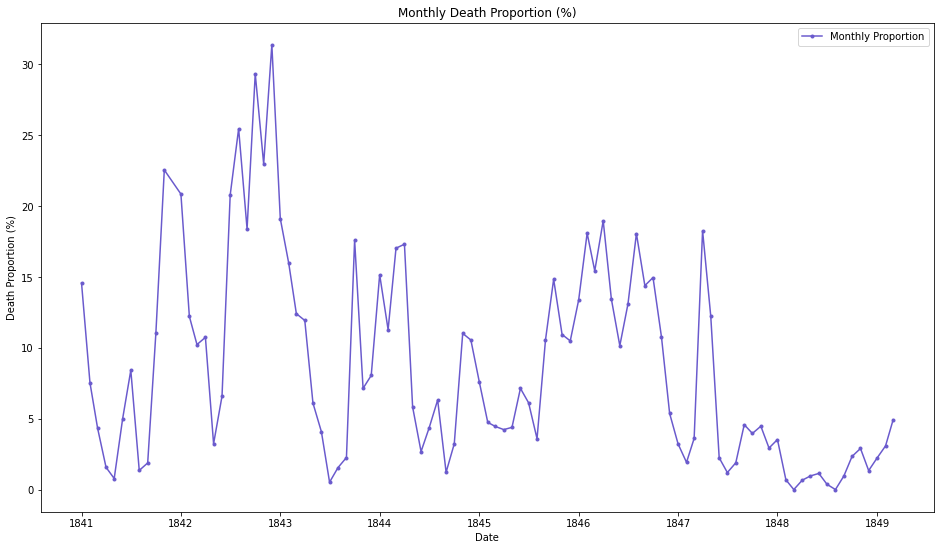

In [22]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(monthly['date'], monthly['proportion'], 
        marker='.', color='slateblue', label='Monthly Proportion')

ax.set_xlabel('Date')
ax.set_ylabel('Death Proportion (%)')
ax.set_title('Monthly Death Proportion (%)')
ax.legend(loc='upper right')

fig.savefig('../Images/monthly_death_proportion.png')
plt.show()

### The effect of handwashing highlighted  
Starting from the summer of 1847 the proportion of deaths is drastically reduced and, yes, this was when Semmelweis made handwashing obligatory.  
The effect of handwashing is made even more clear if we highlight this in the graph.

In [18]:
handwashing_start = pd.to_datetime('1847-06-01')

before_handwashing = monthly[monthly['date'] < handwashing_start]
after_handwashing = monthly[monthly['date'] >= handwashing_start]

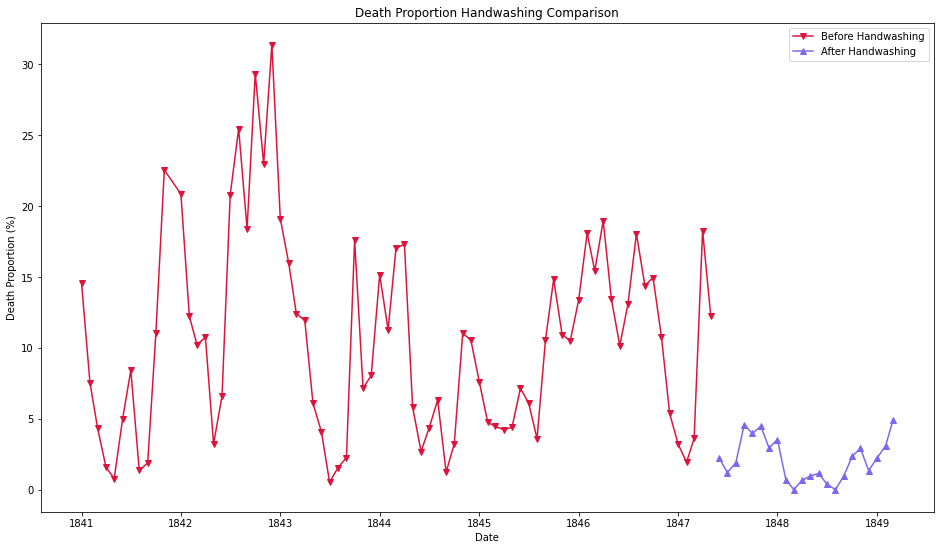

In [27]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(before_handwashing['date'], before_handwashing['proportion'],
        marker='v', color='crimson', label='Before Handwashing')

ax.plot(after_handwashing['date'], after_handwashing['proportion'],
        marker='^', color='mediumslateblue', label='After Handwashing')

ax.set_xlabel('Date')
ax.set_ylabel('Death Proportion (%)')
ax.set_title('Death Proportion Handwashing Comparison')
ax.legend(loc='upper right')

fig.savefig('../Images/death_proportion_handwashing_comparison.png')
plt.show()

### More handwashing, fewer deaths?  
Again, the graph shows that handwashing had a huge effect. How much did it reduce the monthly proportion of deaths on average?

In [28]:
before_proportion = before_handwashing['proportion'].mean()
after_proportion = after_handwashing['proportion'].mean()
mean_diff = after_proportion - before_proportion 
mean_diff

-8.395645933014352

### Exploring Result  
Handwashing effect is reducing death proportion around 8.3% 

In [29]:
before_handwashing.to_csv('../Datasets/before_handwashing.csv', index=False)
after_handwashing.to_csv('../Datasets/after_handwashing.csv', index=False)